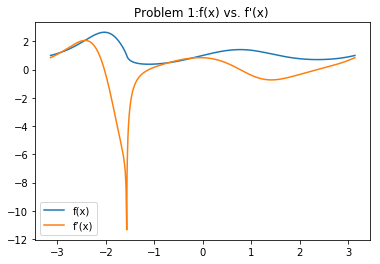

In [84]:
#Problem 1

import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import math

def f1(x):
    return (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
x,y=sy.symbols('x y')
def f1prime(x):
    return sy.diff(f1(x),x)
f=sy.lambdify((x),f1(x),"numpy")
fprime=sy.lambdify((x),f1prime(x),"numpy")

xvals=np.linspace(-math.pi,math.pi,1000)

plt.plot(xvals,f(xvals),label='f(x)')
plt.plot(xvals,fprime(xvals),label='f’(x)')
plt.title("Problem 1:f(x) vs. f'(x) ")
plt.legend()
plt.show()

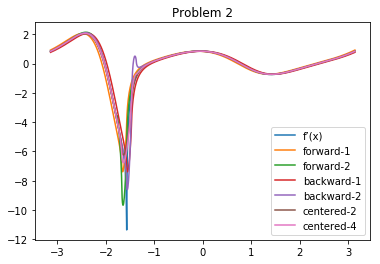

In [85]:
#Problem 2

def fforward1(f,x,h):
    return (f(x+h)-f(x))/h

def fforward2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

def fbackward1(f,x,h):
    return (f(x)-f(x-h))/h

def fbackward2(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

def fcentered2(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def fcentered4(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)


h=0.1
plt.figure()
plt.plot(xvals,fprime(xvals),label='f’(x)')
plt.plot(xvals,fforward1(f,xvals,h),label='forward-1')
plt.plot(xvals,fforward2(f,xvals,h),label='forward-2')
plt.plot(xvals,fbackward1(f,xvals,h),label='backward-1')
plt.plot(xvals,fbackward2(f,xvals,h),label='backward-2')
plt.plot(xvals,fcentered2(f,xvals,h),label='centered-2')
plt.plot(xvals,fcentered4(f,xvals,h),label='centered-4')

plt.title("Problem 2")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Problem 3')

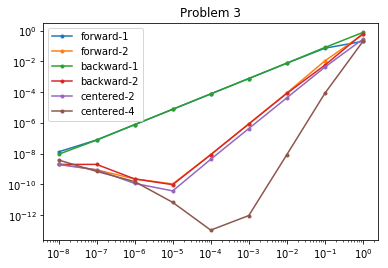

In [86]:
#Problem 3

hvals=np.logspace(-8,0,9)
x0=1
truevalue=fprime(x0)

plt.loglog(hvals,abs(fforward1(f,x0,hvals)-fprime(x0)),'.-',label='forward-1')
plt.loglog(hvals,abs(fforward2(f,x0,hvals)-fprime(x0)),'.-',label='forward-2')
plt.loglog(hvals,abs(fbackward1(f,x0,hvals)-fprime(x0)),'.-',label='backward-1')
plt.loglog(hvals,abs(fbackward2(f,x0,hvals)-fprime(x0)),'.-',label='backward-2')
plt.loglog(hvals,abs(fcentered2(f,x0,hvals)-fprime(x0)),'.-',label='centered-2')
plt.loglog(hvals,abs(fcentered4(f,x0,hvals)-fprime(x0)),'.-',label='centered-4')
plt.legend()
plt.title('Problem 3')

In [87]:
#Problem 4

planedata=np.load("plane.npy")

a,b=sy.symbols('a b')

def computex(a,b):
    return 500*sy.tan(b)/(sy.tan(b)-sy.tan(a))

def computey(a,b):
    return 500*sy.tan(b)*sy.tan(a)/(sy.tan(b)-sy.tan(a))

computex=sy.lambdify((a,b),computex(a,b),"numpy")
computey=sy.lambdify((a,b),computey(a,b),"numpy")

alpha=planedata[:,1]
beta=planedata[:,2]
radiana=np.deg2rad(alpha)
radianb=np.deg2rad(beta)

xcoord=computex(radiana,radianb)
ycoord=computey(radiana,radianb)

xspeed=np.zeros(8)
yspeed=np.zeros(8)
xspeed[0]=xcoord[1]-xcoord[0]
yspeed[0]=ycoord[1]-ycoord[0]
xspeed[7]=xcoord[7]-xcoord[6]
yspeed[7]=ycoord[7]-ycoord[6]


for i in range(1,7):
    xspeed[i]=(xcoord[i+1]-xcoord[i-1])/2
    yspeed[i]=(ycoord[i+1]-ycoord[i-1])/2


speed=np.zeros((2,8))
for i in range(8):
    speed[0,i]=i+7
    speed[1,i]=((xspeed[i])**2+(yspeed[i])**2)**0.5

    
print('-----xspeed-----')
print(xspeed)
print('-----yspeed-----')
print(yspeed)
print('-----speed-----')
print(speed)

-----xspeed-----
[44.6651396  45.32353086 47.28026505 48.36097599 46.65097416 49.70051577
 51.89856915 49.55471108]
-----yspeed-----
[12.65826639 12.44488864 12.86310391 13.08319737 12.47576026 13.73908593
 14.63666859 14.07498803]
-----speed-----
[[ 7.          8.          9.         10.         11.         12.
  13.         14.        ]
 [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
  53.92303355 51.51480057]]


In [89]:
#Problem 5

### !!! DON'T RUN THIS CELL BEFORE RUNNING PROBLEM 7


def Jacobian(f,x0,h):
    J=sy.zeros(len(f),len(x0))
    I=np.identity(len(x0))
    for i,fi in enumerate(f):
        for j,v in enumerate(x0):
            a=x0-h*I[:,j]
            b=x0+h*I[:,j]
            pf=sy.lambdify((x,y),fi,'numpy')
            J[i,j]=(pf(b[0],b[1])-pf(a[0],a[1]))/(2*h)
    return J

x = sy.Symbol('x')
y = sy.Symbol('y')
f1=x**2
f2=x**3-y
f=[f1, f2]
Jacobian(f,[1,1],0.01)


Matrix([
[             2.0,  0.0],
[3.00010000000001, -1.0]])

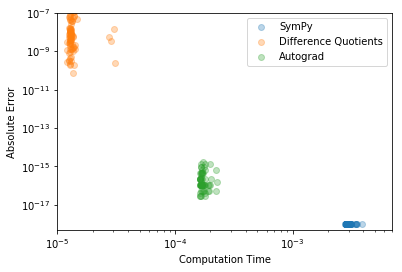

In [88]:
#Problem 7

### !!! DON'T RUN PROBLEM 5 BEFORE RUNNING THIS CELL

from autograd import numpy as anp
from autograd import grad
import random
import time

def sympyt(x0,error,comtime):
    start1=time.perf_counter()
    def f1(x):
        return (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
    def f1prime(x):
        return sy.diff(f1(x),x)
    f=sy.lambdify((x),f1(x),"numpy")
    fprime=sy.lambdify((x),f1prime(x),"numpy")
    truevalue=fprime(x0)
    end1=time.perf_counter()
    comtime.append(end1-start1)
    error.append(1e-18)
    
def dqt(x0,error,comtime):
    start2=time.perf_counter()
    dd=fcentered4(f,x0,0.01)
    end2=time.perf_counter()
    comtime.append(end2-start2)
    error.append(abs(dd-fprime(x0)))
    
def autogradt(x0,error,comtime):
    start3=time.perf_counter()
    f=lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
    df=grad(f)
    dd=df(x0)
    abserror2=abs(dd-fprime(x0))
    end3=time.perf_counter()
    comtime.append(end3-start3)
    error.append(abs(df(x0)-fprime(x0)))
    
def comparison(N,x0):
    plt.figure()
    abserror1=[]
    abserror2=[]
    abserror3=[]
    time1=[]
    time2=[]
    time3=[]
    for i in range(N):
        x0=random.uniform(-10,10)
        sympyt(x0,abserror1,time1)
        dqt(x0,abserror2,time2)
        autogradt(x0,abserror3,time3)
    plt.scatter(np.array(time1),np.array(abserror1),alpha=0.3,label='SymPy')
    plt.scatter(np.array(time2),np.array(abserror2),alpha=0.3,label='Difference Quotients')
    plt.scatter(np.array(time3),np.array(abserror3),alpha=0.3,label='Autograd')
    plt.xlim(10**-5,7*10**-3)
    plt.ylim(5*10**-19,10**-7)
    plt.xlabel('Computation Time')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.loglog()
    plt.show()
    
comparison(100,x0)
